In [9]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [11]:
df_final = pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [12]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [13]:
df_final.shape

(7334, 6)

In [14]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7334.000000,7334.000000,7334.000000,7334.000000,7334.000000,7.334000e+03
mean,28.578362,28.891892,28.261203,28.582426,24.008891,6.022760e+07
std,22.279033,22.476021,22.054379,22.275692,21.941225,3.400345e+07
min,0.591146,0.604167,0.583333,0.598090,0.434039,3.705600e+06
25%,12.457031,12.595703,12.261719,12.488281,9.062849,3.821840e+07
50%,26.980000,27.235000,26.730000,26.990000,20.431164,5.429885e+07
75%,34.716562,35.099998,34.250000,34.687500,26.993589,7.367888e+07
max,115.419998,116.180000,114.930000,115.610001,115.112709,7.645040e+08


In [15]:
df_final.isnull().values.any()

False

<Axes: xlabel='Date'>

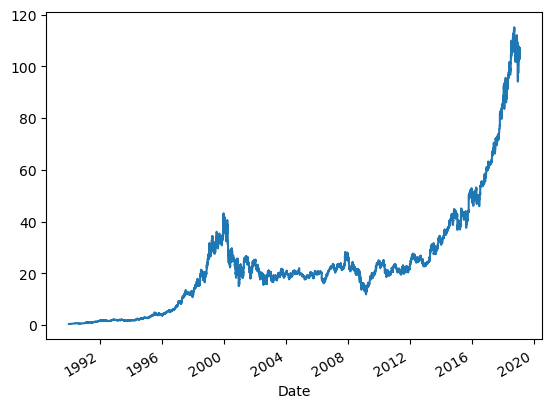

In [16]:
df_final['Adj Close'].plot()

In [17]:
#Correlation Analysis
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

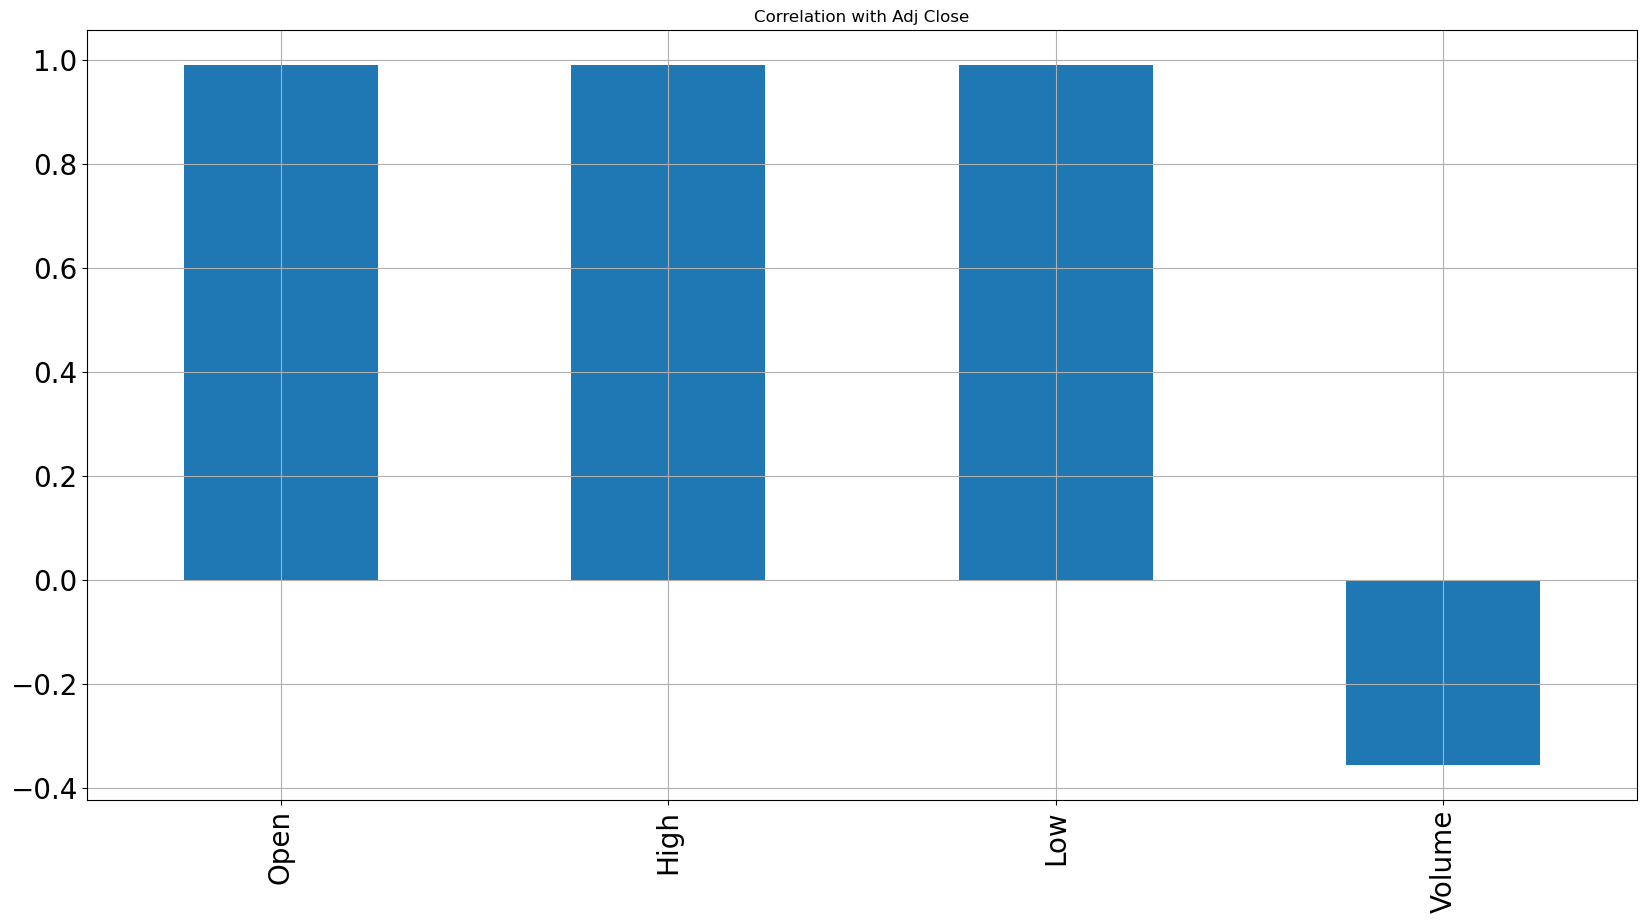

In [18]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [19]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [20]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [21]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


In [22]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


Shape of features :  (7334, 4)
Shape of target :  (7334, 1)


,Open,High,Low,Volume
Date,,,,
2019-02-01,0.898632,0.895480,0.889984,0.041838
2019-02-04,0.890707,0.910189,0.893657,0.036290
2019-02-05,0.918487,0.922908,0.921554,0.031046
2019-02-06,0.926673,0.920572,0.917794,0.022219
2019-02-07,0.910911,0.908372,0.906950,0.034247


,Adj Close
Date,
2019-02-01,105.739998
2019-02-04,107.220001
2019-02-05,106.029999
2019-02-06,105.269997
2019-02-07,105.669998



 -----After process------ 

Shape of features :  (7244, 4)
Shape of target :  (7244, 1)


,Adj Close
Date,
2018-09-24,113.957695
2018-09-25,113.489723
2018-09-26,113.917870
2018-09-27,113.878044
2018-09-28,115.112709


In [24]:
#Train test Split using Timeseriessplit
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [25]:
X_train.shape

(6586, 4)

In [26]:
X_test.shape

(658, 4)

In [27]:
y_train.shape

(6586,)

In [28]:
y_test.shape

(658,)

In [29]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  64.22105109555618
R2 score:  -304.3934023786509


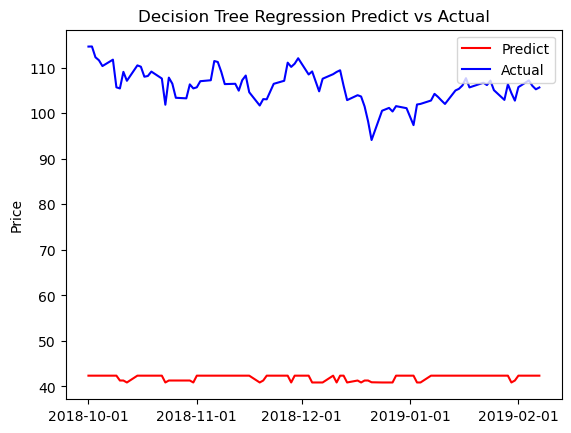

In [30]:
#Benchmark Model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [31]:
#Process the data for LSTM
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [32]:
#Model building : LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])


Epoch 1/200
824/824 [==============================] - 30s 21ms/step - loss: 109.5453
Epoch 2/200
824/824 [==============================] - 19s 23ms/step - loss: 29.8520
Epoch 3/200
824/824 [==============================] - 18s 22ms/step - loss: 23.9157
Epoch 4/200
824/824 [==============================] - 20s 25ms/step - loss: 12.4166
Epoch 5/200
824/824 [==============================] - 22s 27ms/step - loss: 4.9065
Epoch 6/200
824/824 [==============================] - 28s 34ms/step - loss: 1.8866
Epoch 7/200
824/824 [==============================] - 27s 33ms/step - loss: 1.1553
Epoch 8/200
824/824 [==============================] - 23s 28ms/step - loss: 0.9538
Epoch 9/200
824/824 [==============================] - 24s 29ms/step - loss: 0.8578
Epoch 10/200
824/824 [==============================] - 26s 32ms/step - loss: 0.8008
Epoch 11/200
824/824 [==============================] - 26s 32ms/step - loss: 0.7661
Epoch 12/200
824/824 [==============================] - 27s 33ms/step

In [33]:
#Evaluation of Model
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

206/206 [==============================] - 6s 22ms/step
The R2 score on the Train set is:	0.883
The R2 score on the Test set is:	0.880


In [34]:
#Predictions made by LSTM
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

658/658 [==============================] - 18s 21ms/step - loss: 43.2494


In [35]:
print('LSTM: %f'%score_lstm)

LSTM: 43.249359


In [36]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

21/21 [==============================] - 2s 38ms/step


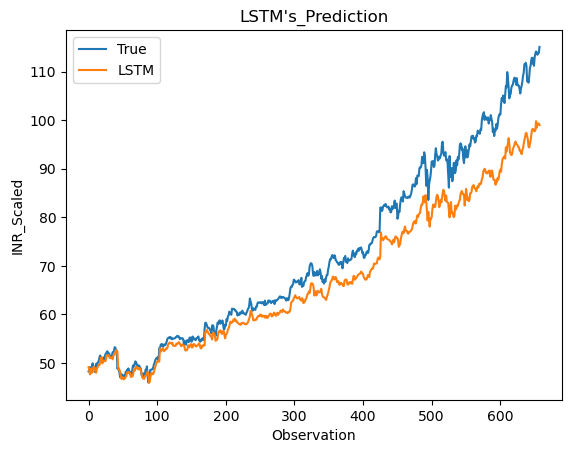

In [37]:
#LSTM's Prediction Visual
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()